In [1]:
import os
import numpy as np 
from scipy import ndimage
import imageio # uses the Image module (PIL)

# constants 
INPUT_FOLDER = './data/'
patients = os.listdir(INPUT_FOLDER)
patients.sort()

In [2]:
import matplotlib.pyplot as plt

In [3]:
def read_image(in_file):
    image = imageio.imread(in_file)
    return image

def get_the_image_list(input_path):
    image_list = []
    image_list_append = image_list.append
      
    if os.path.exists(input_path) and os.path.isdir(input_path):
        files = os.listdir(input_path)
        files.sort()
        for f in files:
            if f.endswith('png'):
                image = read_image(input_path + "\\" + f)
                image_list_append(image)
  
    return image_list

In [4]:
slices = {}

for patient in patients:
    slices_ = get_the_image_list(INPUT_FOLDER + patient)
    slices[patient] = slices_

In [5]:
im = slices[patients[0]][32]

we don't have x-rays type of image. we can't get Hounsfield unit histogram

In [6]:
im.max(), im.min(), im.dtype

(255, 2, dtype('uint8'))

In [7]:
im.shape #there is not chanels

(1024, 1024)

In [8]:
def show_clear(image, vmin=0, vmax=255):
    plt.axis('off')
    plt.imshow(image, cmap='gray', vmin=vmin, vmax=vmax)
    plt.colorbar()

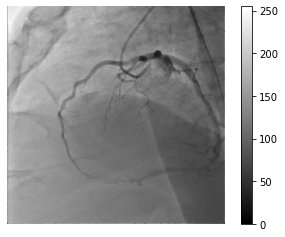

In [9]:
show_clear(im)

In [10]:
files = os.listdir(INPUT_FOLDER+'//'+patients[0])
name_of_file = files[32]

In [11]:
name_of_file

'0789_Im00746676_00032.png'

In [12]:
im_gray = plt.imread(INPUT_FOLDER+'//'+patients[0]+'//'+name_of_file)

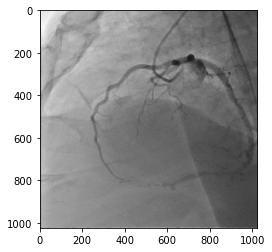

In [13]:
plt.imshow(im_gray, cmap='gray') #plt normilises images to 255 - 1.
plt.show();

In [14]:
im_gray.max(), im_gray.min(), im_gray.dtype

(1.0, 0.007843138, dtype('float32'))

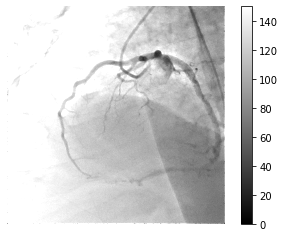

In [15]:
show_clear(im, 0, 150) #we can exlude part of while colors. We have noisy background

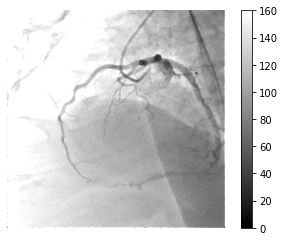

In [16]:
show_clear(im, 0, 160)

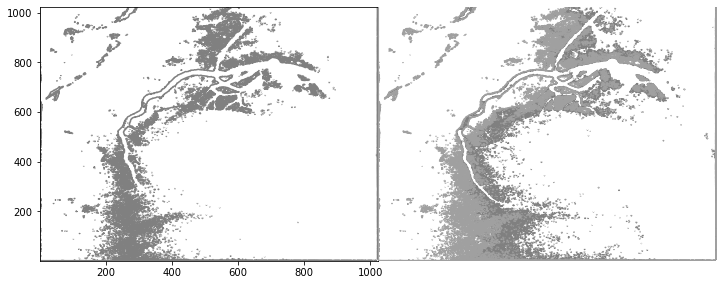

In [17]:
plt.figure(figsize=(10, 3.6))

plt.subplot(121)
plt.contour(im,[0,140], origin='image', colors=['#808080'])

plt.subplot(122)
plt.contour(im,[0,140], origin='image', levels=[130, 140],
    colors=['#808080', '#A0A0A0'], extend='max')
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0., top=0.99, bottom=0.01, left=0.05,
                    right=0.99)
plt.show();

In [18]:
blurred_im = ndimage.gaussian_filter(im, sigma=3)
very_blurred_im = ndimage.gaussian_filter(im, sigma=5)

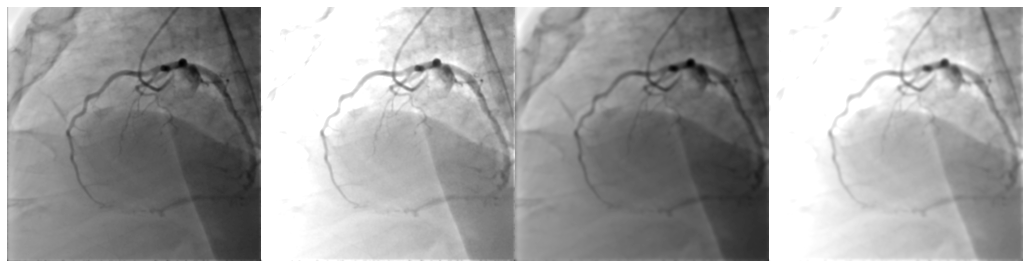

In [19]:
plt.figure(figsize=(15, 3.6))

plt.subplot(141)
plt.imshow(blurred_im, cmap='gray')
plt.axis('off')

plt.subplot(142)
plt.imshow(blurred_im, cmap='gray', vmin=0, vmax=150)
plt.axis('off')

plt.subplot(143)
plt.imshow(very_blurred_im, cmap='gray')
plt.axis('off')

plt.subplot(144)
plt.imshow(very_blurred_im, cmap='gray', vmin=0, vmax=150)
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0., top=0.99, bottom=0.01, left=0.05,
                    right=0.99)
plt.show();

increase the weight of edges by adding an approximation of the Laplacian:

In [20]:
im_float = im.astype(float)
blurred_im = ndimage.gaussian_filter(im_float, sigma=25)
blurred_im1 = ndimage.gaussian_filter(im_float, sigma=1)
alpha = 10
sharpened = blurred_im + alpha * (blurred_im - blurred_im1)

In [21]:
sharpened.max(), sharpened.min()

(1683.668298448545, -791.8406618249356)

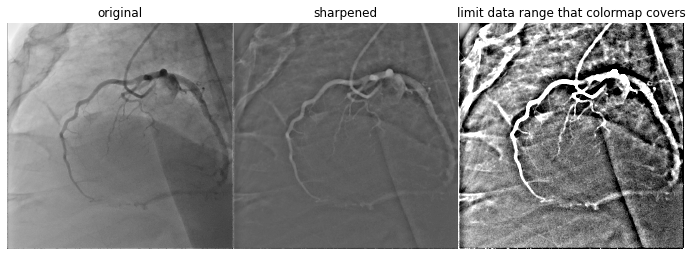

In [22]:
plt.figure(figsize=(10, 3.6))

plt.subplot(131)
plt.imshow(im_float, cmap='gray', vmin=0, vmax=255)
plt.title('original')
plt.axis('off')

plt.subplot(132)
plt.imshow(sharpened, cmap='gray')
plt.title('sharpened')
plt.axis('off')

plt.subplot(133)
plt.imshow(sharpened, cmap='gray', vmin=0, vmax=255)
plt.title('limit data range that colormap covers')
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0., top=0.99, bottom=0.01, left=0.05,
                    right=0.99)
plt.show();

In [23]:
from skimage import filters

In [24]:
# take origin. not norm image
noisy = im + 0.4 * im.std() * np.random.random(size=im.shape) #adding random noise

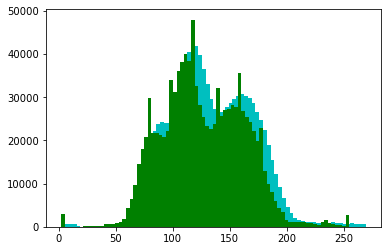

In [25]:
plt.hist(noisy.flatten(), bins=80, color='c')
plt.hist(im.flatten(), bins=80, color='g', histtype='barstacked')
plt.show();

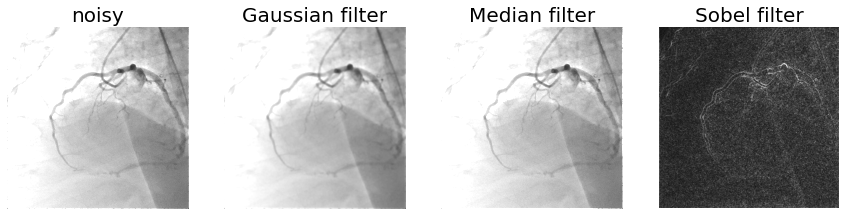

In [26]:
gauss_denoised = ndimage.gaussian_filter(noisy, 3)
med_denoised = ndimage.median_filter(noisy, 2)
sobel_denoised = filters.sobel(noisy, mode='mirror')

plt.figure(figsize=(12,2.8))

plt.subplot(141)
plt.imshow(noisy, cmap=plt.cm.gray, vmin=0, vmax=160)
plt.axis('off')
plt.title('noisy', fontsize=20)
plt.subplot(142)
plt.imshow(gauss_denoised, cmap=plt.cm.gray, vmin=0, vmax=160)
plt.axis('off')
plt.title('Gaussian filter', fontsize=20)
plt.subplot(143)
plt.imshow(med_denoised, cmap=plt.cm.gray, vmin=0, vmax=160)
plt.axis('off')
plt.title('Median filter', fontsize=20)
plt.subplot(144)
plt.imshow(sobel_denoised, cmap = 'gray', vmin=0, vmax=30)
plt.axis('off')
plt.title('Sobel filter', fontsize=20)

plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0,
                    right=1)
plt.show()

In [28]:
gauss_denoised.min(), gauss_denoised.max()

(33.496275417925276, 256.2814938278635)

(-0.5, 1023.5, 1023.5, -0.5)

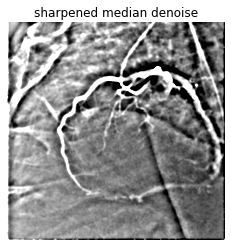

In [30]:
blurred_im = ndimage.gaussian_filter(gauss_denoised, sigma=25)
blurred_im1 = ndimage.gaussian_filter(gauss_denoised, sigma=1)
alpha = 10
sharpened_denoisy = blurred_im + alpha * (blurred_im - blurred_im1)
plt.imshow(sharpened_denoisy, cmap='gray', vmin=0, vmax=255)
plt.title('sharpened median denoise')
plt.axis('off')


In [31]:
sharpened_denoisy.max(), sharpened_denoisy.min()

(881.8703372456117, -317.5364849200527)

(-0.5, 1023.5, 1023.5, -0.5)

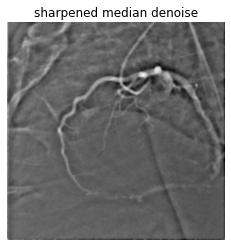

In [32]:
plt.imshow(sharpened_denoisy, cmap='gray')
plt.title('sharpened median denoise')
plt.axis('off')

Mathematical morphology

In [58]:
im_marph = sharpened.clip(0,255)
#im_marph1 = ndimage.binary_dilation(im_marph)
im_marph2 = sharpened_denoisy.clip(0,255)
#im_marph3 = ndimage.binary_dilation(im_marph2)

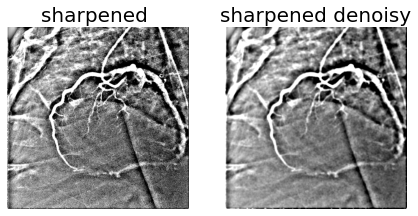

In [59]:
plt.figure(figsize=(6,2.8))

plt.subplot(121)
plt.imshow(im_marph.astype(int), cmap=plt.cm.gray)
plt.axis('off')
plt.title('sharpened ', fontsize=20)
plt.subplot(122)
plt.imshow(im_marph2.astype(int), cmap=plt.cm.gray)
plt.axis('off')
plt.title('sharpened denoisy', fontsize=20)
plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0,
                    right=1)
plt.show()

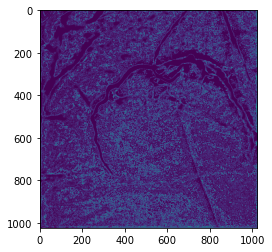

In [96]:
plt.imshow(~im_marph2.astype(int)&im_marph.astype(int));

In [62]:
im_marph.min(), im_marph.max()

(0.0, 255.0)

In [63]:
im_marph2.min(), im_marph2.max()

(4.638872438844644e-08, 255.06999921117676)

Finding edges with Sobel filters

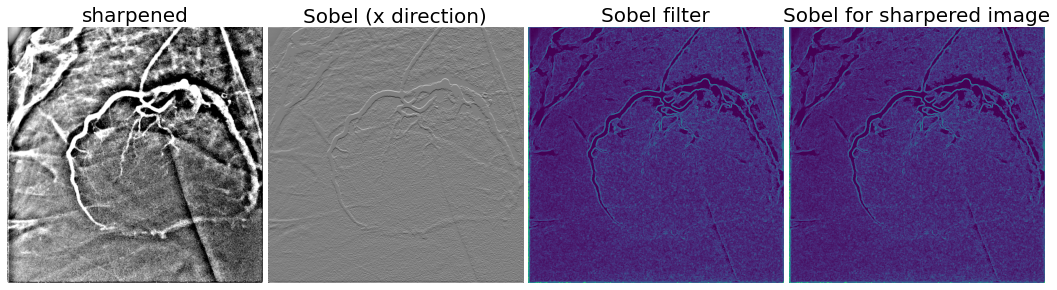

In [64]:
sx = ndimage.sobel(im_marph, axis=0, mode='constant')
sy = ndimage.sobel(im_marph, axis=1, mode='constant')
#sqrt(x1**2 + x2**2)
sob = np.hypot(sx, sy)

plt.figure(figsize=(16, 5))
plt.subplot(141)
plt.imshow(im_marph, cmap=plt.cm.gray)
plt.axis('off')
plt.title('sharpened', fontsize=20)
plt.subplot(142)
plt.imshow(sx, cmap='gray')
plt.axis('off')
plt.title('Sobel (x direction)', fontsize=20)
plt.subplot(143)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel filter', fontsize=20)

im_marph += 0.07*np.random.random(im_marph.shape)

sx = ndimage.sobel(im_marph, axis=0, mode='constant')
sy = ndimage.sobel(im_marph, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.subplot(144)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel for sharpered image', fontsize=20)



plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=0.9)

plt.show()

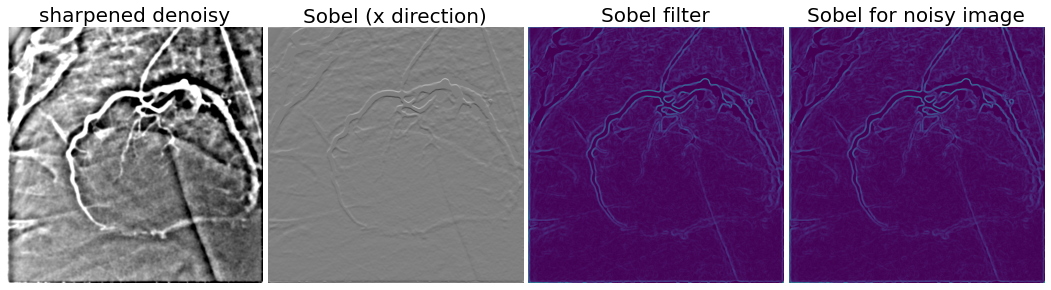

In [85]:
sx = ndimage.sobel(im_marph2, axis=0, mode='constant')
sy = ndimage.sobel(im_marph2, axis=1, mode='constant')
#sqrt(x1**2 + x2**2)
sob = np.hypot(sx, sy)

plt.figure(figsize=(16, 5))
plt.subplot(141)
plt.imshow(im_marph2, cmap=plt.cm.gray)
plt.axis('off')
plt.title('sharpened denoisy', fontsize=20)
plt.subplot(142)
plt.imshow(sx, cmap='gray')
plt.axis('off')
plt.title('Sobel (x direction)', fontsize=20)
plt.subplot(143)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel filter', fontsize=20)

im_marph2 += 0.07*np.random.random(im_marph2.shape)

sx = ndimage.sobel(im_marph2, axis=0, mode='constant')
sy = ndimage.sobel(im_marph2, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.subplot(144)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel for noisy image', fontsize=20)



plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=0.9)

plt.show()

Histogram segmentation

In [67]:
hist, bin_edges = np.histogram(sob, bins=60)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])

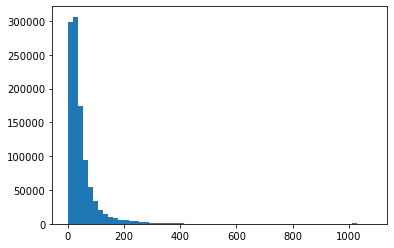

In [87]:
plt.hist(sob.ravel(), bins=60);
#plt.axvline(x=15, color='r') #sob.ravel().mean()

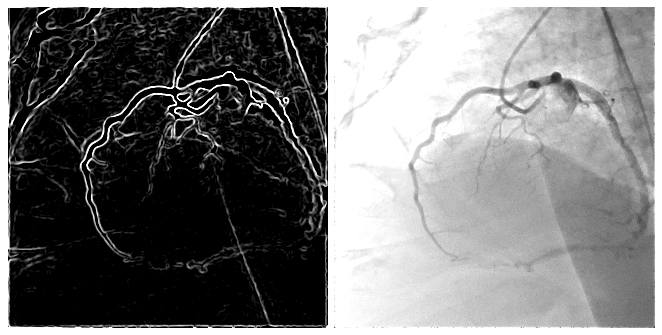

In [133]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(sob, vmin=40, vmax=255, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(im, vmin=0, vmax=160, cmap='gray')
plt.axis('off')
plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=0.9)

plt.show()

we did the contrast image to be able to get edges

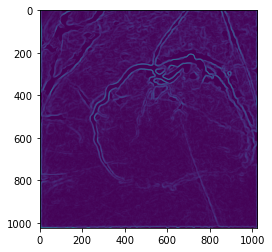

In [266]:
plt.imshow(sob);

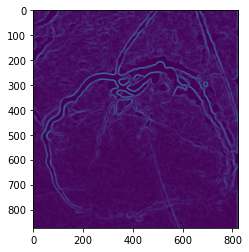

In [278]:
plt.imshow(sob[:-150,200:]);

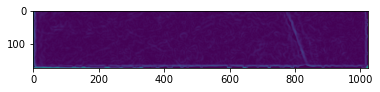

In [289]:
plt.imshow(sob[850:]);

In [290]:
sob[850:] = 0

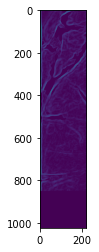

In [297]:
plt.imshow(sob[:,:220]);

In [298]:
sob[:,:220] = 0

In [299]:
sob.mean()

32.44410867389697

Analysis of connected components

In [303]:
mask = sob < sob.mean()

In [304]:
label_im, nb_labels = ndimage.label(mask)
nb_labels # how many regions?

1234

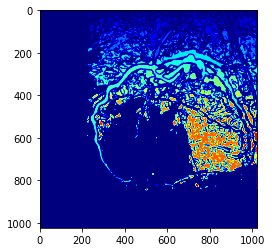

In [305]:
plt.imshow(label_im, cmap='jet')  

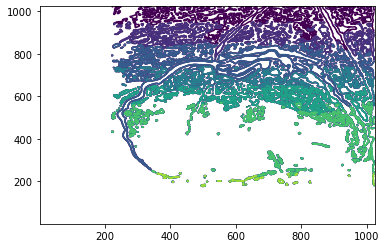

In [313]:
plt.contour(label_im,origin='image')

In [306]:
sizes = ndimage.sum(mask, label_im, range(nb_labels + 1))
mean_vals = ndimage.sum(im, label_im, range(1, nb_labels + 1))

In [307]:
sizes.max()

506934.0

In [309]:
mask_size = sizes > 30000
remove_pixel = mask_size[label_im]
  


In [310]:
sum(mask_size)

2

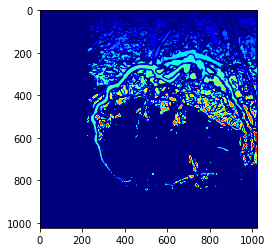

In [311]:

label_im[remove_pixel] = 0
plt.imshow(label_im, cmap='jet')        

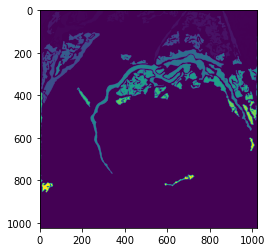

In [237]:
label_im[remove_pixel] = 0
plt.imshow(label_im)      

working with scikit-image

In [144]:
from skimage import measure

In [168]:
contours = measure.find_contours(sob, 0.5, fully_connected='high', positive_orientation='high', mask=mask)

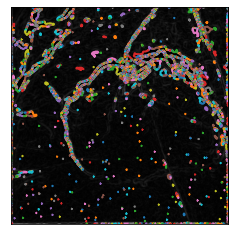

In [169]:
# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(sob, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [201]:
#Collect contours 
results = []
for c in contours:
    # Now examine 
    ll, ur = np.min(c, 0), np.max(c, 0)
    wh = ur - ll
    area =  wh[0] * wh[1]
    if area<300:
        results.append(c)

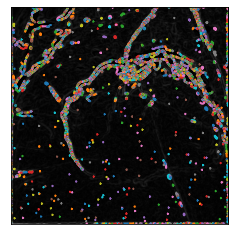

In [202]:
# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(sob, cmap=plt.cm.gray)

for contour in results:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

The Watershed Transformation, spectral_clustering after clear mask